# Primera evaluación

Librerías que se usaran.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
import pandas.util.testing as tm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Le damos forma a nuestros datos con un dataframe.

In [46]:
url="https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Eval1/data/co2_spo_DailyData.txt"
df = pd.read_csv(url, encoding='cp1251', sep='\s+', header=None, skiprows=150, skipfooter=1, engine='python')

df = df.drop(0,axis=0)

df["Fecha"] = df[3].map(str) + "/" + df[2]+"/"+ df[1]
df["Fecha"] = pd.to_datetime(df["Fecha"],dayfirst=True,errors ='coerce')
df["Año"] = df["Fecha"].dt.year
df["Mes"] =df["Fecha"].dt.month
df["Día"] =df["Fecha"].dt.day
df = df.set_index("Fecha")

df=df.drop(range(0, 8), axis=1)
df=df.drop(range(9, 17), axis=1)

df[8]=df[8].astype(float)

df=df.replace(to_replace=-999.99, value=np.nan, regex=True)

df.columns=["Value", "Año", "Mes", "Dia"]

df1=df[(df['Año']>=1981) & (df['Año']<2019)].copy()
df1.ffill(axis=0, inplace=True)

df1.head(20)

,Value,Año,Mes,Dia
Fecha,,,,
1981-01-01,338.03,1981,1,1
1981-01-02,338.07,1981,1,2
1981-01-03,338.12,1981,1,3
1981-01-04,338.06,1981,1,4
1981-01-05,338.05,1981,1,5
1981-01-06,338.04,1981,1,6
1981-01-07,338.14,1981,1,7
1981-01-08,337.94,1981,1,8
1981-01-09,337.97,1981,1,9


Concentración de CO2.

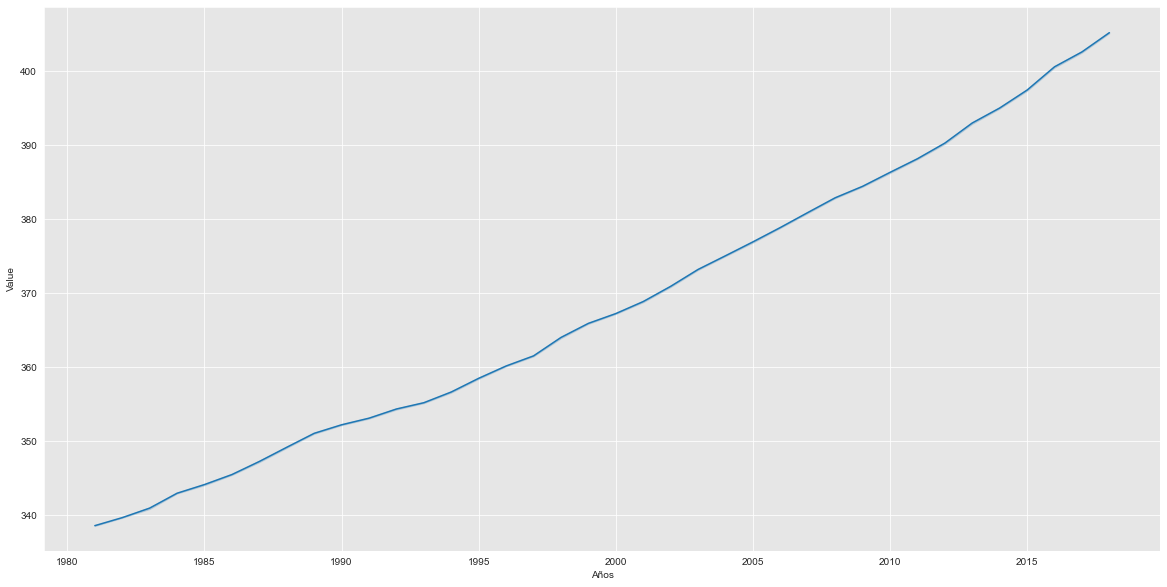

In [47]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(20,10))

sns.lineplot(x='Año', y='Value', data=df1)
plt.xlabel('Años')
plt.ylabel('Value')
plt.show()

Prueba avanzada de Dickey-Fuller

In [67]:
def test_stationarity(df_ts):
    
    rolmean=df_ts.rolling(window=365, center=True,min_periods=1).mean()
    rolstd=df_ts.rolling(window=365, center=True,min_periods=1).std() 
    
    plt.rcParams["figure.figsize"] = (16,8)
    
    plt.plot(df_ts, color='black',label='Original')
    plt.plot(rolmean, color='blue', label='Rolling Mean')
    plt.plot(rolstd, color='red', label = 'Rolling Std Deviation')
    
    plt.title('Promedio Móvil y Desviación Estándar')
    plt.grid()
    plt.show()
    
    print('Resultados de la Prueba de Dickey-Fuller:')
    dftest = adfuller(df_ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value',
                                '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Serie de tiempo a analizar.

In [68]:
df1_test=df1['Value'].copy()
df1_test

Fecha
1981-01-01    338.03
1981-01-02    338.07
1981-01-03    338.12
1981-01-04    338.06
1981-01-05    338.05
               ...  
2018-12-27    406.47
2018-12-28    406.42
2018-12-29    406.31
2018-12-30    406.36
2018-12-31    406.28
Name: Value, Length: 13879, dtype: float64

Prueba de estacionaridad para el valor del CO2.

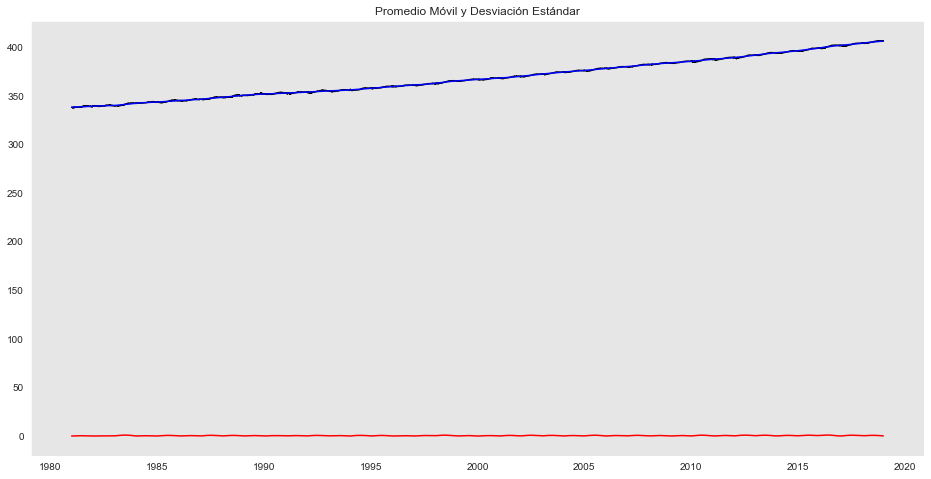

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                     1.167436
p-value                            0.995753
#Lags Used                        42.000000
Number of Observations Used    13836.000000
Critical Value (1%)               -3.430823
Critical Value (5%)               -2.861749
Critical Value (10%)              -2.566881
dtype: float64


In [69]:
test_stationarity(df1_test)

El valor de P es mayor que el 5%.

Le aplicamos logaritmo para reducir el valor de P.

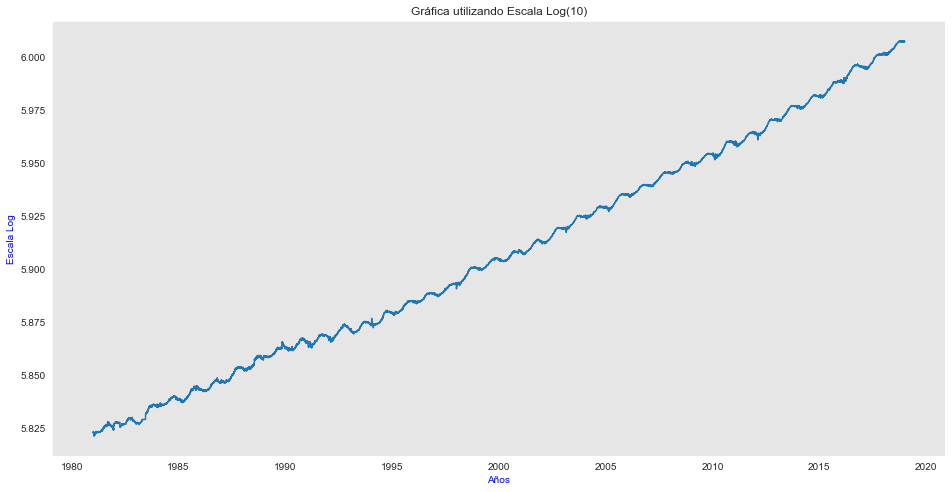

In [70]:
ts_test_log=np.log(df1_test)
plt.plot(ts_test_log)
plt.xlabel('Años',color='b')
plt.ylabel('Escala Log',color='b')
plt.title('Gráfica utilizando Escala Log(10)')
plt.grid()
plt.show()

Promedio movil.

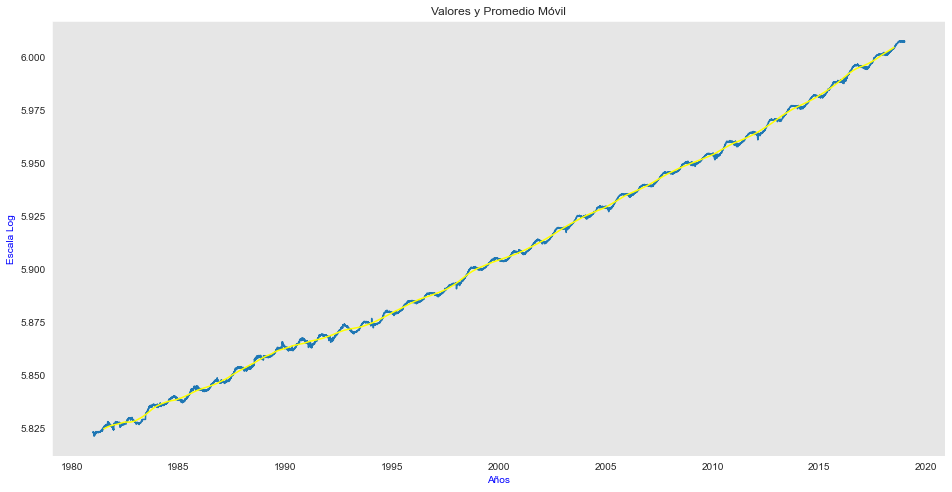

In [71]:
moving_avg = ts_test_log.rolling(365, center=True).mean()
plt.plot(ts_test_log)
plt.plot(moving_avg, color = 'yellow')
plt.xlabel('Años',color='b')
plt.ylabel('Escala Log',color='b')
plt.title('Valores y Promedio Móvil')
plt.grid()
plt.show()

In [72]:
ts_test_log_moving_ave_diff=ts_test_log - moving_avg 
ts_test_log_moving_ave_diff.head()

Fecha
1981-01-01   NaN
1981-01-02   NaN
1981-01-03   NaN
1981-01-04   NaN
1981-01-05   NaN
Name: Value, dtype: float64

In [73]:
ts_test_log_moving_ave_diff.dropna(inplace=True)
ts_test_log_moving_ave_diff.head()

Fecha
1981-07-02    0.000187
1981-07-03    0.000175
1981-07-04    0.000193
1981-07-05    0.000477
1981-07-06    0.000406
Name: Value, dtype: float64

Prueba de estacionaridad con el logaritmo ya aplicado.

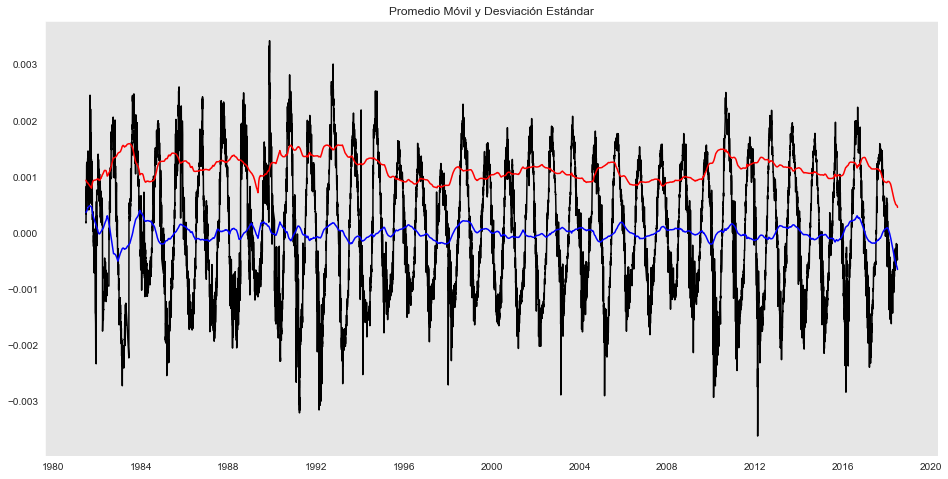

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.065544e+01
p-value                        4.546999e-19
#Lags Used                     4.000000e+01
Number of Observations Used    1.347400e+04
Critical Value (1%)           -3.430835e+00
Critical Value (5%)           -2.861755e+00
Critical Value (10%)          -2.566884e+00
dtype: float64


In [74]:
test_stationarity(ts_test_log_moving_ave_diff)

El valor de p es menor al 5%, por lo tanto es estacionaria.

Usaremos el metodo de descomposición para obtener 3 componentes: Tendencia, estacionalidad y un residuo.

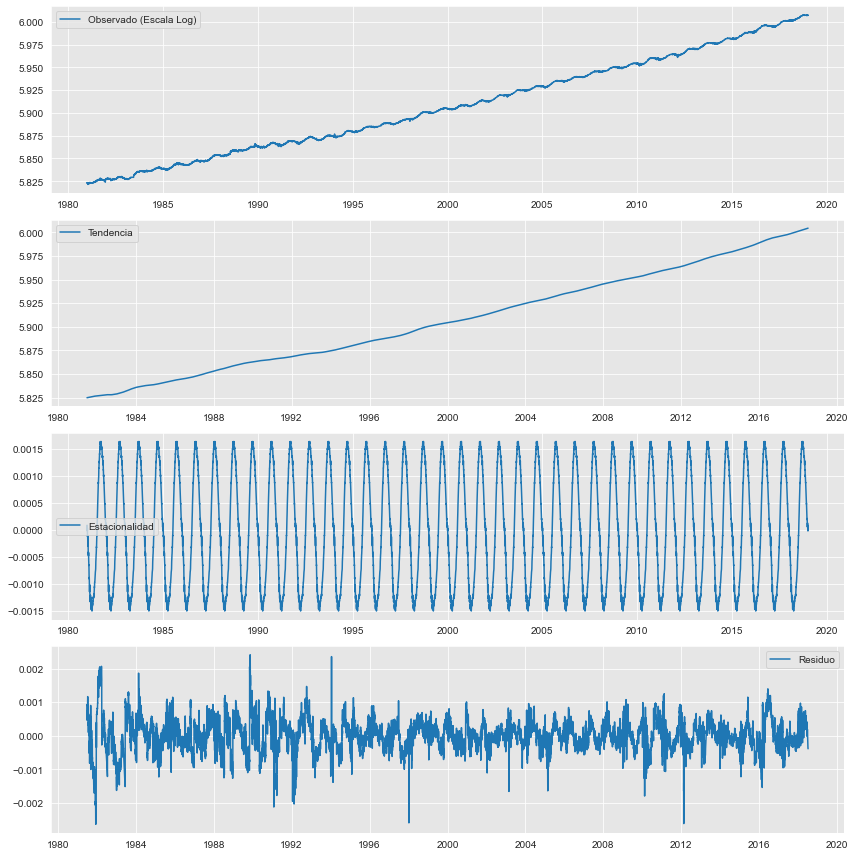

In [75]:
des = sm.tsa.seasonal_decompose(ts_test_log.interpolate(), model='additive', period=365)

trend = des.trend
seasonal = des.seasonal
residue = des.resid

plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(411)
plt.plot(ts_test_log, label='Observado (Escala Log)')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residue, label='Residuo')
plt.legend(loc='best')

plt.tight_layout()

Dejamos de lado la tendencia y la estacionalidad para ver si el residuo es estacionario.

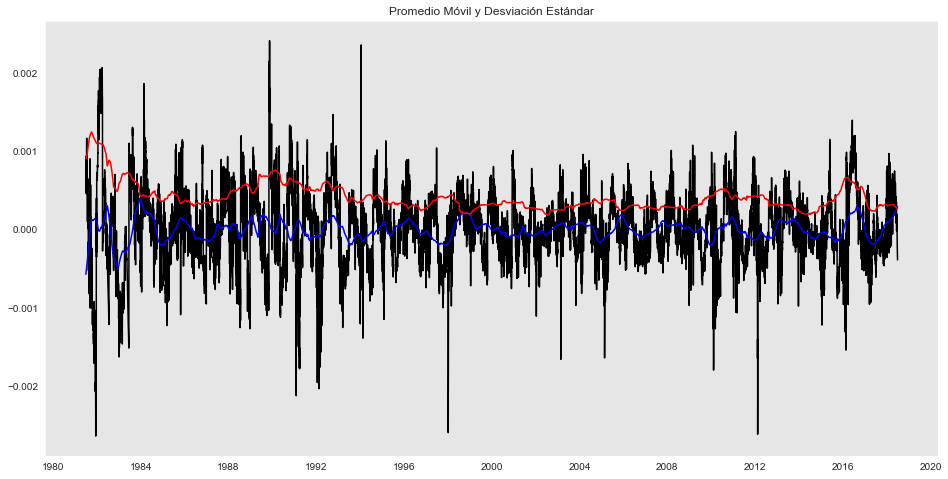

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.102900e+01
p-value                        5.731134e-20
#Lags Used                     2.800000e+01
Number of Observations Used    1.348600e+04
Critical Value (1%)           -3.430835e+00
Critical Value (5%)           -2.861754e+00
Critical Value (10%)          -2.566884e+00
dtype: float64


In [76]:
ts_test_log_decompose = residue 
ts_test_log_decompose.dropna(inplace=True)
test_stationarity(ts_test_log_decompose)

Claramente el residuo también es estacionario.

Promedio Movil.

Text(0.5, 1.0, 'promedio móvil con un periodo de 365 días')

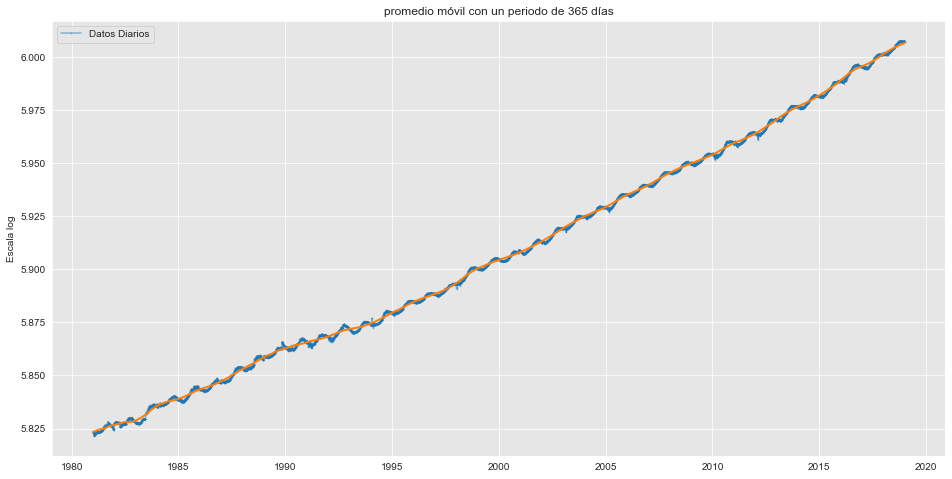

In [77]:
moving_avg = ts_test_log.rolling(365, center=True,min_periods=1).mean()
 
fig, ax = plt.subplots()
ax.plot(ts_test_log, marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
ax.plot(moving_avg, linewidth=2)
    
ax.legend()
ax.set_ylabel("Escala log")
ax.set_title('promedio móvil con un periodo de 365 días')

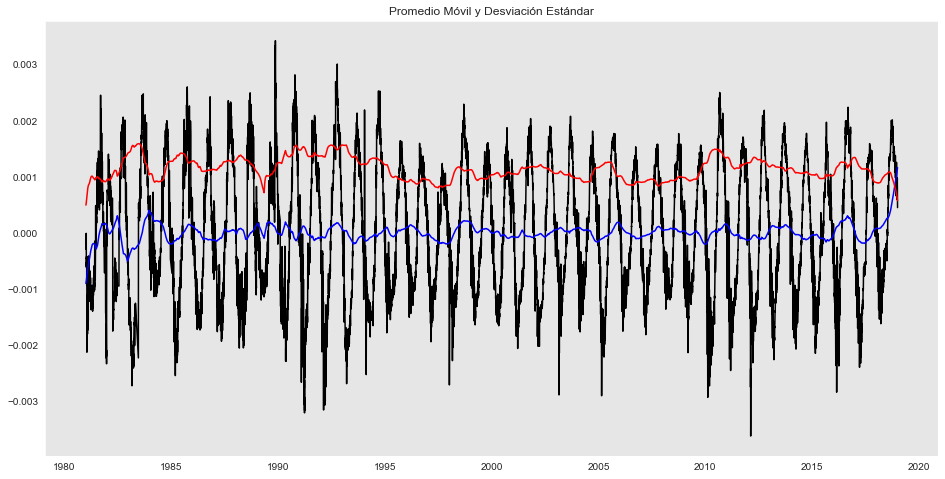

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.118665e+01
p-value                        2.425673e-20
#Lags Used                     4.200000e+01
Number of Observations Used    1.383600e+04
Critical Value (1%)           -3.430823e+00
Critical Value (5%)           -2.861749e+00
Critical Value (10%)          -2.566881e+00
dtype: float64


In [78]:
ts_dif = ts_test_log - moving_avg 
ts_dif.dropna(inplace=True)

test_stationarity(ts_dif)

Sigue siendo estacionaria.

Diferenciamos usando df.shift().

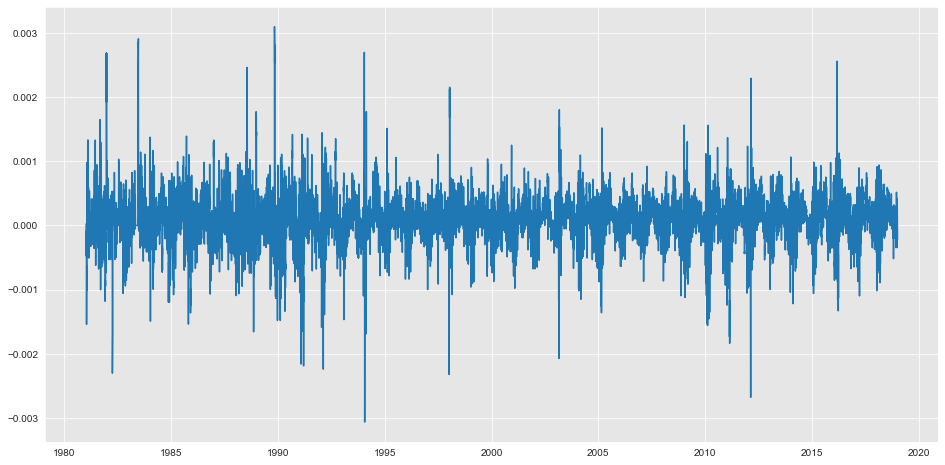

In [79]:
ts_test_log_diff = ts_test_log - ts_test_log.shift(periods=7)
plt.plot(ts_test_log_diff)

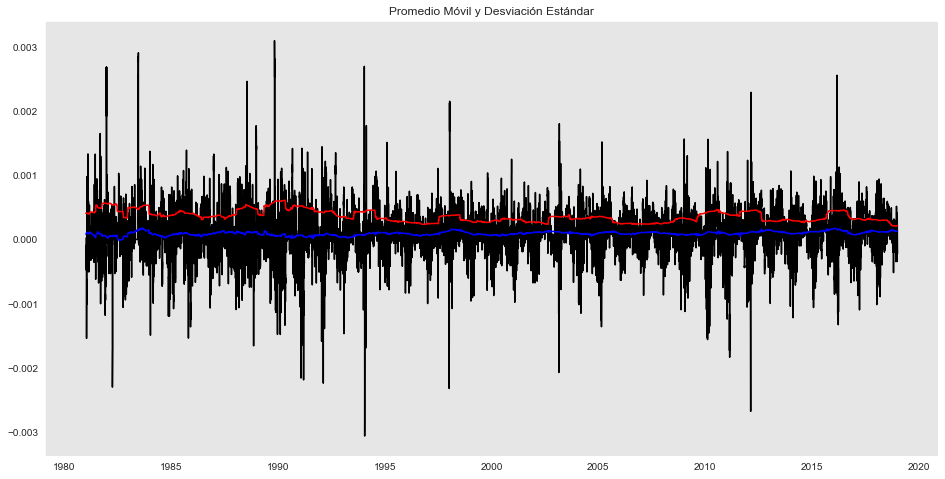

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.142571e+01
p-value                        6.703736e-21
#Lags Used                     4.200000e+01
Number of Observations Used    1.382900e+04
Critical Value (1%)           -3.430823e+00
Critical Value (5%)           -2.861749e+00
Critical Value (10%)          -2.566881e+00
dtype: float64


In [80]:
ts_test_log_diff.dropna(inplace=True)
test_stationarity(ts_test_log_diff)

Modelo ARIMA de la serie.

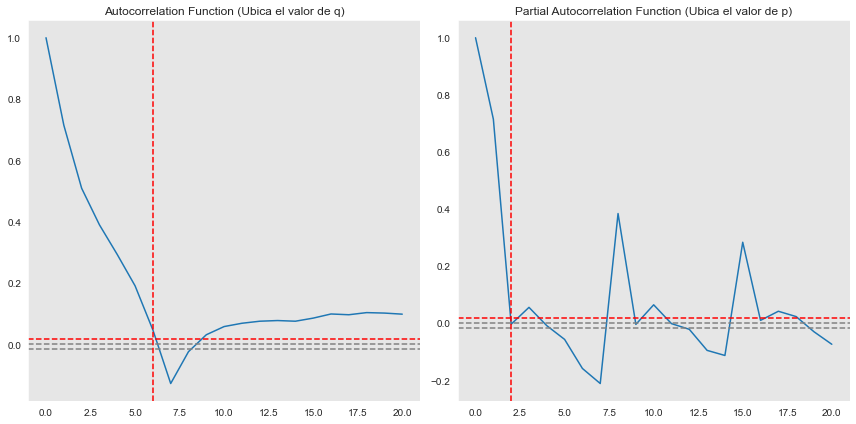

In [83]:
lag_acf = acf(ts_test_log_diff, nlags=20)
lag_pacf = pacf(ts_test_log_diff, nlags=20, method = 'ols')


plt.rcParams["figure.figsize"] = (12,6)


plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='red')

plt.axvline(x=6, linestyle='--', color='red')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='red')
 
plt.axvline(x=2, linestyle='--', color='red')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')

plt.tight_layout()

MODELO AR ( AUTO-REGRESION )
Modelo AR(p): (p,d,q) = (2,1,0) 

E:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                13871
Model:                 ARIMA(2, 1, 0)   Log Likelihood               94043.202
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 24 Feb 2021   AIC                        -188078.404
Time:                        20:01:01   BIC                        -188048.253
Sample:                    01-09-1981   HQIC                       -188068.362
                         - 12-31-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.692e-09   1.74e-06      0.003      0.998   -3.42e-06    3.42e-06
ar.L1.D.Value    -0.1640      0.008    -19.614      0.000      -0.180      -0.148
ar.L2.D.Value    -0.1741      0.008    -

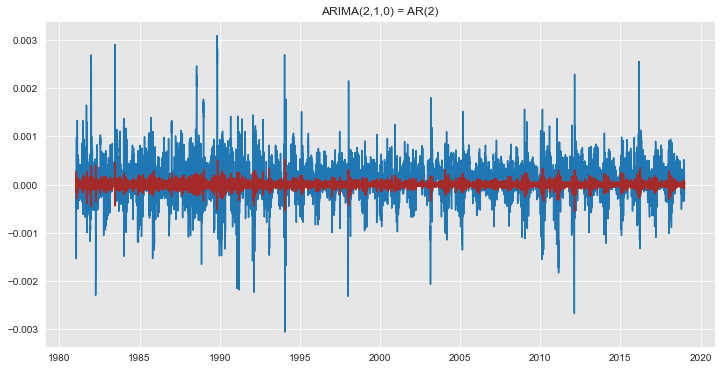

In [84]:
model = ARIMA(ts_test_log_diff, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

MODELO MA ( PROMEDIO MOVIL )
Modelo MA(q): (p,d,q) = (0,1,6) 

E:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\Python\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Python\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Python\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Python\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: in

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                13871
Model:                 ARIMA(0, 1, 6)   Log Likelihood               94836.213
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 24 Feb 2021   AIC                        -189656.425
Time:                        20:02:57   BIC                        -189596.125
Sample:                    01-09-1981   HQIC                       -189636.341
                         - 12-31-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.768e-09   1.38e-07      0.013      0.990   -2.69e-07    2.73e-07
ma.L1.D.Value    -0.4001      0.026    -15.619      0.000      -0.450      -0.350
ma.L2.D.Value    -0.4741        nan     

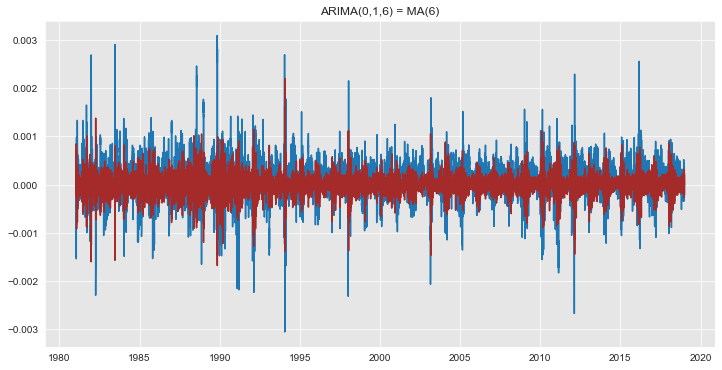

In [86]:
model = ARIMA(ts_test_log_diff, order=(0,1,6), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_MA.fittedvalues, color='brown')
plt.title('ARIMA(0,1,6) = MA(6)')
print(results_MA.summary())

MODELO DE ARIMA (AUTO-REGRESION + PROMEDIO MOVIL)
Modelo ARIMA(p): (p,d,q) = (2,1,6) 

E:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\Python\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
E:\Python\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                13871
Model:                 ARIMA(2, 1, 6)   Log Likelihood               94250.390
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 24 Feb 2021   AIC                        -188480.780
Time:                        20:04:03   BIC                        -188405.405
Sample:                    01-09-1981   HQIC                       -188455.675
                         - 12-31-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.736e-08   9.79e-07      0.018      0.986    -1.9e-06    1.94e-06
ar.L1.D.Value    -0.1709        nan        nan        nan         nan         nan
ar.L2.D.Value    -0.1379        nan     

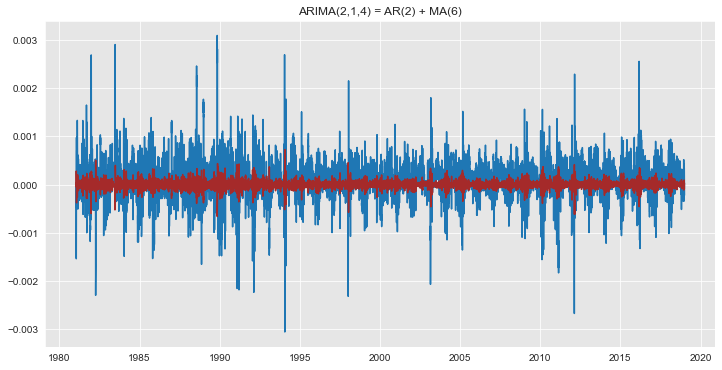

In [87]:
model = ARIMA(ts_test_log_diff, order=(2,1,6), missing='drop')
results_ARIMA = model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='brown')
plt.title('ARIMA(2,1,4) = AR(2) + MA(6)')
print(results_ARIMA.summary())

AIC PARA EL MODELO AR    =                          -188078.404

AIC PARA EL MODELO MA    =                          -189656.425

AIC PARA EL MODELO ARIMA =                          -188480.780

Podemos afirmar que AM (0,1,6) es el mejor modelo de los 3 que exploramos.

In [96]:
predictions_MA_diff=pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff)

Fecha
1981-01-09    1.768432e-09
1981-01-10    5.347130e-06
1981-01-11    6.633931e-05
1981-01-12    2.170890e-05
1981-01-13   -1.747215e-04
                  ...     
2018-12-27   -1.604453e-05
2018-12-28   -2.166550e-04
2018-12-29    2.225622e-04
2018-12-30    1.976875e-05
2018-12-31   -1.689695e-05
Length: 13871, dtype: float64


Suma de las predicciones ARIMA a la serie observada.

In [97]:
predictions_MA_log = pd.Series(ts_test_log_diff, index = ts_test_log_diff.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff)
print(predictions_MA_log.head())
print(predictions_MA_log.tail())

Fecha
1981-01-08         NaN
1981-01-09   -0.000296
1981-01-10   -0.000468
1981-01-11   -0.000141
1981-01-12   -0.000067
dtype: float64
Fecha
2018-12-27    0.000230
2018-12-28   -0.000266
2018-12-29    0.000272
2018-12-30   -0.000103
2018-12-31   -0.000238
dtype: float64


Regresamos a la escala original

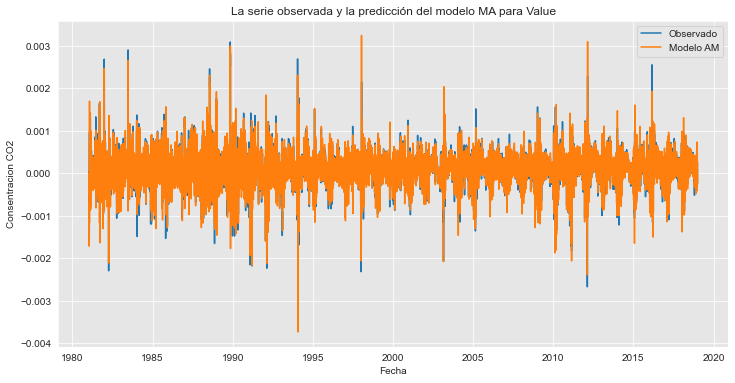

In [104]:
predictions_MA = np.exp(predictions_MA_log)

plt.rcParams["figure.figsize"] = (12,6)

plt.plot(ts_test_log_diff, label='Observado');
plt.plot(predictions_MA_log, label='Modelo AM');
plt.xlabel('Fecha')
plt.ylabel('Consentracion CO2')
plt.title('La serie observada y la predicción del modelo MA para Value')
plt.legend(loc='best')

Calculamos el RMSE (Root Mean Square Error - Error de la Raiz Cuadrada de la Media.

In [105]:
RMSE = np.sqrt(np.mean((predictions_MA_log - ts_test_log_diff)**2))
print('RMSE:', RMSE)

RMSE: 0.0001994561541074662


Un error considerablemente pequeño.

Contrasta los 5 últimos años de la Serie de CO2 y el modelo AR para ver mas a detalles el modelo.

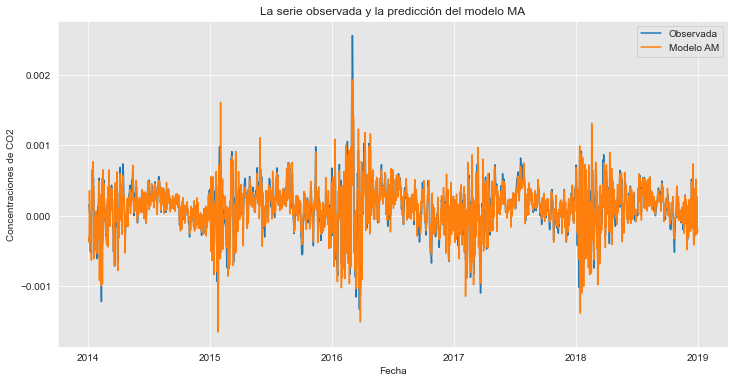

In [102]:
ts_test_last = ts_test_log_diff.tail(1825)
predictions_MA_last = predictions_MA_log.tail(1825)
plt.plot(ts_test_last, label='Observada');
plt.plot(predictions_MA_last, label='Modelo AM');
plt.xlabel('Fecha')
plt.ylabel('Concentraciones de CO2')
plt.title('La serie observada y la predicción del modelo MA')
plt.legend(loc='best')